# PCA and the relationship with MV = PY

In [13]:
import pandas as pd
import os
from plotly import express
import seaborn as sn
import datetime as dt


In [14]:
path = '.../Data/MVPY'
# Make sure to not hardtype
os.chdir(path)

csvlist = os.listdir(path)
csvlist.remove('.DS_Store')
csvlist

['CPI.csv', 'GDPC1.csv', 'M2V.csv', 'M2SL.csv']

In [15]:
df = pd.read_csv('CPI.csv', index_col = 'DATE')
df.index = pd.to_datetime(df.index)

for csvfile in csvlist[1:]:
    dfnew = pd.read_csv(csvfile, index_col = 'DATE')
    dfnew.index = pd.to_datetime(dfnew.index)
    df = pd.merge(df, dfnew, on = "DATE")
    
df

,CPIAUCSL,GDPC1,M2V,M2SL
DATE,,,,
1959-01-01,28.9933333333333333,3121.936,1.773,287.8333333333333333
1959-04-01,29.0433333333333333,3192.380,1.789,292.1333333333333333
1959-07-01,29.1933333333333333,3194.653,1.773,296.1000000000000000
1959-10-01,29.3700000000000000,3203.759,1.779,297.1333333333333333
1960-01-01,29.3966666666666667,3275.757,1.817,298.7000000000000000
...,...,...,...,...
2019-04-01,255.1706666666666667,19020.599,1.454,14665.200000000000
2019-07-01,256.3246666666666667,19141.744,1.442,14939.433333333333
2019-10-01,257.8323333333333333,19253.959,1.427,15236.033333333333


In [16]:
df.dtypes

CPIAUCSL     object
GDPC1       float64
M2V         float64
M2SL         object
dtype: object

In [17]:
df['CPIAUCSL'] = df['CPIAUCSL'].astype('float')
df['M2SL'] = df['M2SL'].astype('float')

In [18]:
df = df.pct_change()

In [19]:
df = df.dropna()

In [20]:
df.columns = ['Pct_Infl', 'Pct_GDP', 'Pct_Vel', 'Pct_M2']

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt

In [22]:
df.dtypes

Pct_Infl    float64
Pct_GDP     float64
Pct_Vel     float64
Pct_M2      float64
dtype: object

<Figure size 432x288 with 0 Axes>

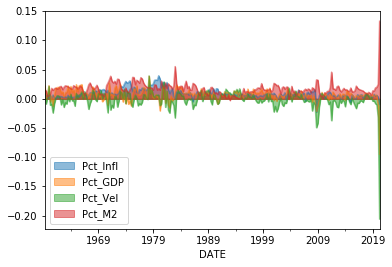

In [23]:
plt.figure()
df.plot.area(stacked = False)

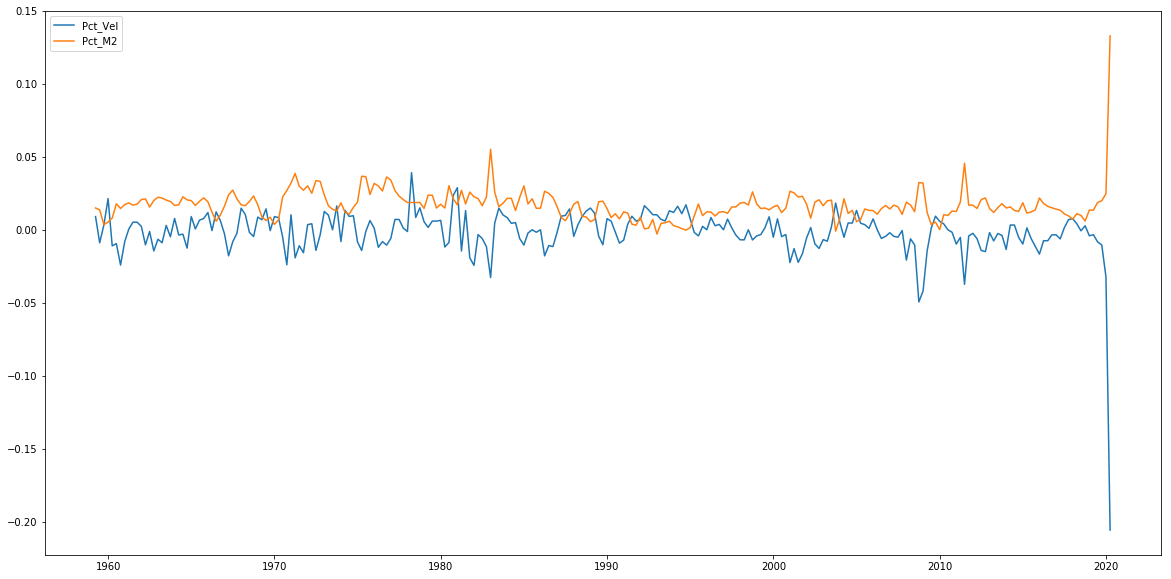

In [27]:
plt.figure(figsize=(20,10))
plt.plot((df.Pct_Vel))
plt.plot(df.Pct_M2)
plt.legend()

- Essentially, using MV = PY. You can do a very common maneuver in economics, put both sides and log form and take the derivative. This process will leave you with the equation of:


### %△M + %△P = %△V + %△Y

- Alright, lets see if this empirically holds.

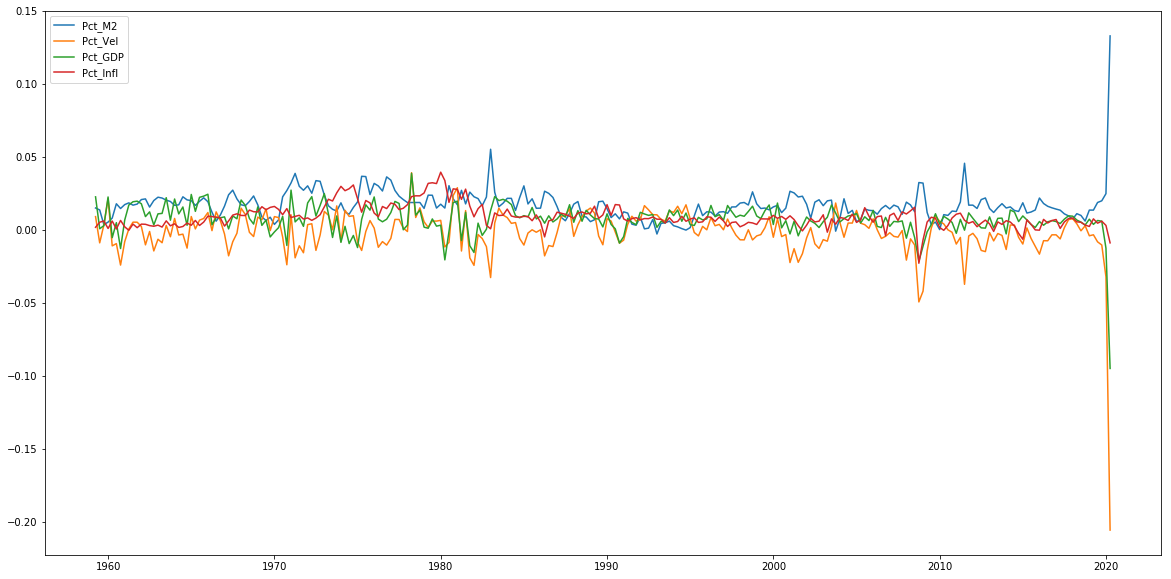

In [29]:
plt.figure(figsize=(20,10))
plt.plot((df.Pct_M2))
plt.plot(df.Pct_Vel)
plt.plot(df.Pct_GDP)
plt.plot(df.Pct_Infl)
plt.legend()

In [55]:
dfpc = pd.DataFrame()

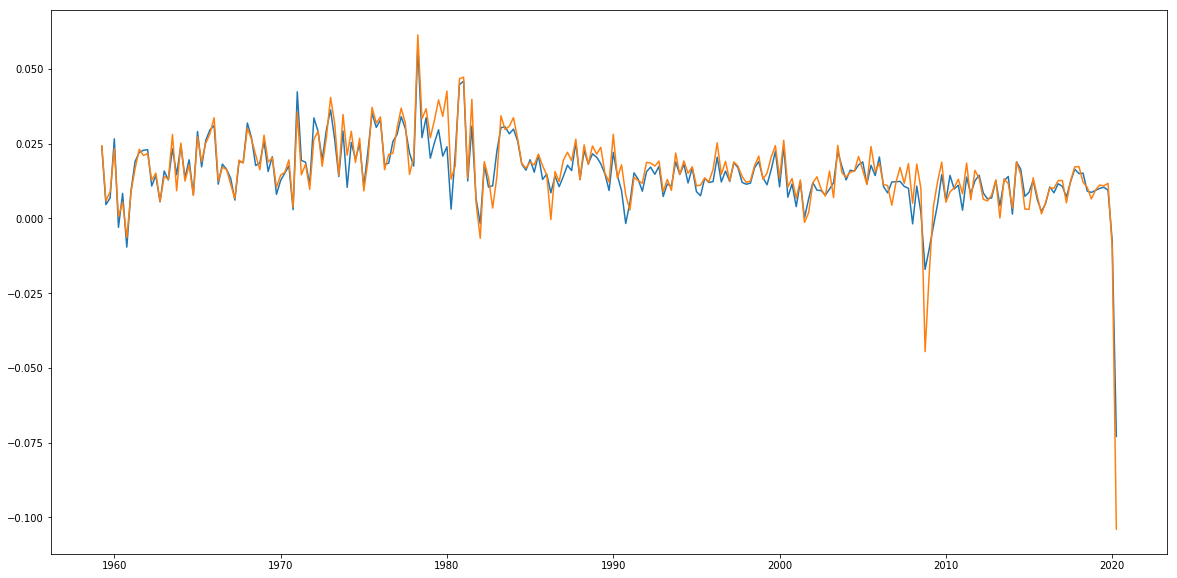

In [65]:
plt.figure(figsize=(20,10))

dfpc['pctMandV'] = df.Pct_M2 + df.Pct_Vel - 2
dfpc['pctPandY'] = df.Pct_GDP + df.Pct_Infl - 2
plt.plot(dfpc)

df

In [61]:
dfpc.head(5)

,pctMandV,pctPandY
DATE,,
1959-04-01,0.023963,0.024289
1959-07-01,0.004635,0.005877
1959-10-01,0.006874,0.008902
1960-01-01,0.026633,0.023381
1960-04-01,-0.002972,0.000616


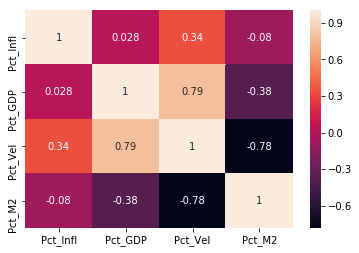

In [30]:
sn.heatmap(df.corr(), annot=True)
plt.show()

In [31]:
df

,Pct_Infl,Pct_GDP,Pct_Vel,Pct_M2
DATE,,,,
1959-04-01,0.001725,0.022564,0.009024,0.014939
1959-07-01,0.005165,0.000712,-0.008944,0.013578
1959-10-01,0.006052,0.002850,0.003384,0.003490
1960-01-01,0.000908,0.022473,0.021360,0.005273
1960-04-01,0.006010,-0.005394,-0.011007,0.008035
...,...,...,...,...
2019-04-01,0.007483,0.003707,-0.003427,0.013474
2019-07-01,0.004522,0.006369,-0.008253,0.018700
2019-10-01,0.005882,0.005862,-0.010402,0.019853


In [32]:
annualize = lambda x: x + 1
df = df.applymap(annualize)

In [33]:
dfyear = df.groupby(df.index.year).prod()

In [34]:
dfyear = dfyear.applymap(lambda x: x -1)

In [35]:
dfyear

,Pct_Infl,Pct_GDP,Pct_Vel,Pct_M2
DATE,,,,
1959,0.012991,0.026209,0.003384,0.032310
1960,0.013960,0.008818,-0.023609,0.046444
1961,0.007052,0.063958,0.002879,0.072041
1962,0.013004,0.043070,-0.023536,0.079700
1963,0.013935,0.051583,-0.017049,0.086413
...,...,...,...,...
2016,0.017989,0.020676,-0.034690,0.072812
2017,0.021208,0.027033,-0.001382,0.048916
2018,0.022032,0.024755,0.013841,0.034636


In [36]:
normalized_dfyear=(dfyear-dfyear.mean())/dfyear.std()
normalized_dfyear

,Pct_Infl,Pct_GDP,Pct_Vel,Pct_M2
DATE,,,,
1959,-0.810575,-0.074875,0.249296,-1.220783
1960,-0.776684,-0.698687,-0.410721,-0.751680
1961,-1.018465,1.279143,0.236934,0.097924
1962,-0.810126,0.529918,-0.408945,0.352128
1963,-0.777567,0.835257,-0.250319,0.574936
...,...,...,...,...
2016,-0.635682,-0.273349,-0.681669,0.123506
2017,-0.523018,-0.045308,0.132754,-0.669639
2018,-0.494173,-0.127024,0.504979,-1.143578


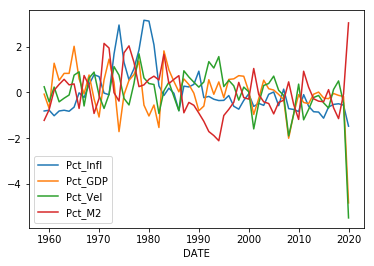

In [37]:
normalized_dfyear.plot()

In [38]:
from sklearn.decomposition import PCA
    
pca = PCA(n_components=2)
pca.fit(normalized_dfyear)
print(pca.explained_variance_ratio_)

[0.5004513  0.27487072]


# Principal Component Analysis Plot

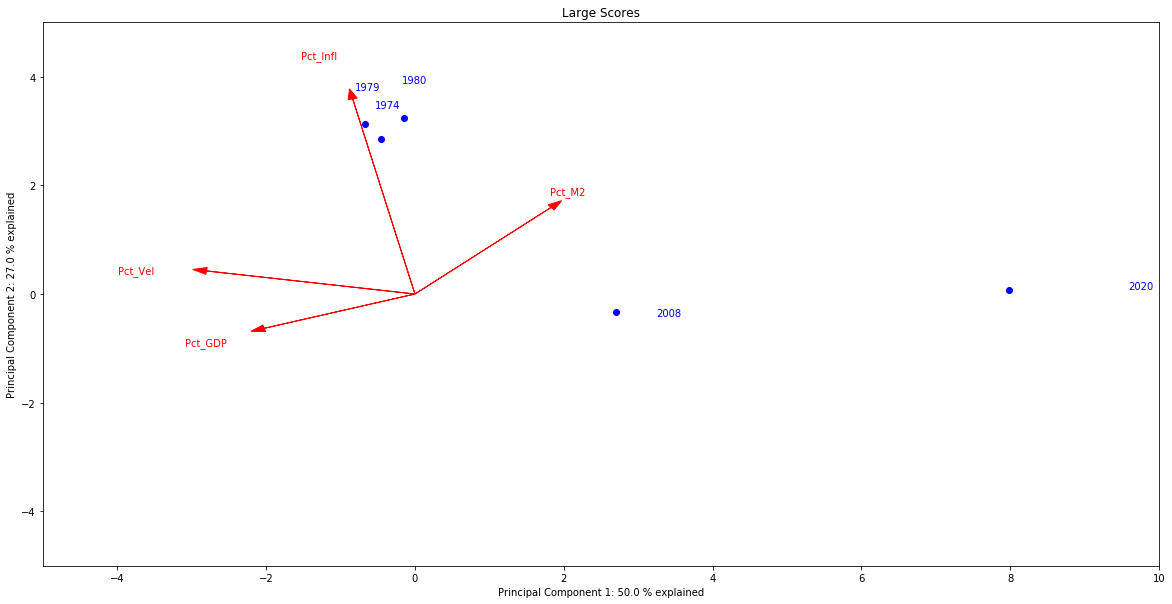

<Figure size 7200x3600 with 0 Axes>

In [48]:
plt.figure(figsize=(20,10))

xvector = pca.components_[0] 
yvector = pca.components_[1]

xs = pca.transform(normalized_dfyear)[:,0] 
ys = pca.transform(normalized_dfyear)[:,1]

plt.xlim((-5,10))
plt.ylim((-5,5))
plt.xlabel(f'Principal Component 1: {round(pca.explained_variance_ratio_[0], 3) * 100} % explained')
plt.ylabel(f'Principal Component 2: {round(pca.explained_variance_ratio_[1], 2) * 100} % explained')
plt.title('Large Scores')


for i in range(len(xvector)):
    plt.arrow(0, 0, xvector[i]*4, yvector[i]*4,
              color='r', width=0.0005, head_width=0.125)
    plt.text(xvector[i]*5, yvector[i]*5,
             list(normalized_dfyear.columns.values)[i], color='r',horizontalalignment = 'right', verticalalignment = 'top')

for i in range(len(xs)):
    if ys[i] > abs(2.5) or xs[i] > abs(2.5):
        plt.plot(xs[i], ys[i], 'bo',)
        plt.text(xs[i]*1.2, ys[i]*1.2, list(normalized_dfyear.index)[i], color='b')

plt.figure(figsize=(100,50))
plt.show()

### Interpretation 

